In [2]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker to upload your CSV


Saving loan_cleaned1.csv to loan_cleaned1.csv


In [5]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 2. Load Data
# ===============================
# If already loaded from MySQL, skip this and use df = your_dataframe
df = pd.read_csv("loan_cleaned1.csv")



In [6]:
# ========================
# 📌 3. EDA (Exploratory Data Analysis)
# ========================

# Basic dataset info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

# Check unique values in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts().head())

# Correlation of numerical features
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr)

Dataset Shape: (2818, 13)

Data Types:
 ApplicationDate            object
Age                         int64
EmploymentStatus           object
AnnualIncome                int64
CreditScore                 int64
LoanAmount                  int64
MonthlyIncome             float64
MonthlyDebtPayments         int64
TotalDebtToIncomeRatio    float64
LoanApproved                int64
InterestRate              float64
MonthlyLoanPayment        float64
RiskScore                   int64
dtype: object

Missing Values:
 ApplicationDate           0
Age                       0
EmploymentStatus          0
AnnualIncome              0
CreditScore               0
LoanAmount                0
MonthlyIncome             0
MonthlyDebtPayments       0
TotalDebtToIncomeRatio    0
LoanApproved              0
InterestRate              0
MonthlyLoanPayment        0
RiskScore                 0
dtype: int64

Summary Statistics:
        ApplicationDate          Age EmploymentStatus   AnnualIncome  \
count           

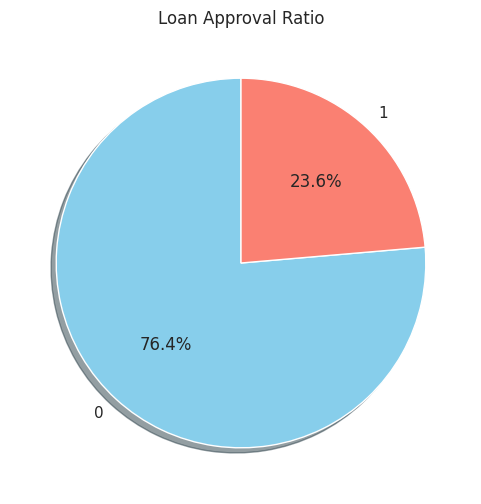

In [7]:
# ========================
# 📌 4. Visualization
# ========================

# 1. Loan Approval Distribution
# This shows the proportion of approved vs. not approved loans.

plt.figure(figsize=(6,6))
df['LoanApproved'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90, shadow=True
)
plt.title("Loan Approval Ratio")
plt.ylabel("")
plt.show()


The chart shows that 76.4% of loan applications were denied and only 23.6% approved, indicating a strict approval process or high applicant risk.

/tmp/ipython-input-3562146288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LoanApproved', y='CreditScore', data=df, palette=['salmon','skyblue'])


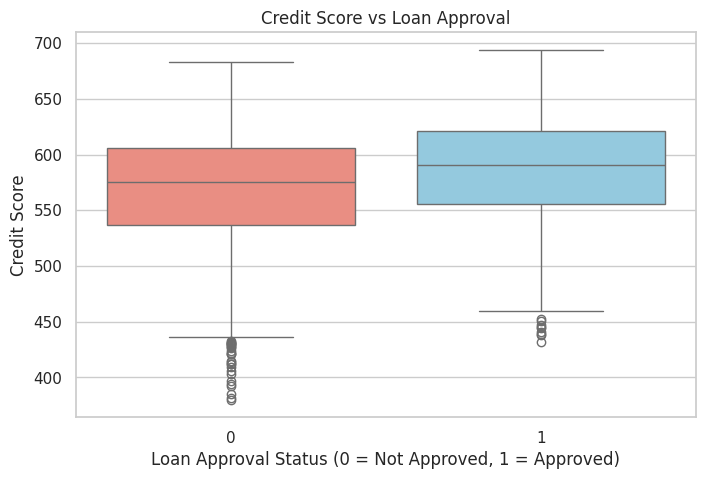

In [43]:

# 2️ Credit Score Distribution (Histogram)
# This plot helps to understand the distribution of credit scores in the dataset.


plt.figure(figsize=(8,5))
sns.boxplot(x='LoanApproved', y='CreditScore', data=df, palette=['salmon','skyblue'])
plt.title("Credit Score vs Loan Approval")
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Credit Score")
plt.show()

Approved applicants tend to have higher median credit scores and a narrower interquartile range, indicating more consistent credit profiles. In contrast, not approved applicants show greater variability in scores and more low-score outliers. While lower scores are more common in the rejected group, both groups have similar upper score limits, suggesting that high credit scores alone do not guarantee approval.

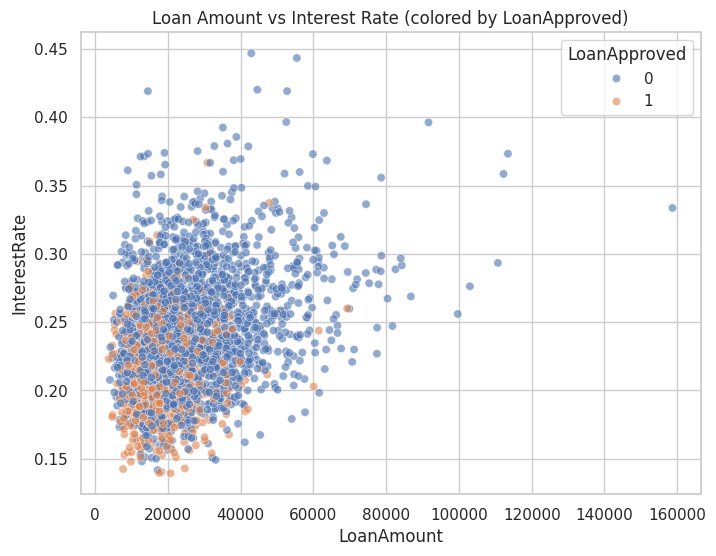

In [10]:
# 3. Loan Amount vs Interest Rate
#  Scatter plot highlights the relationship between loan amount and interest rate.

plt.figure(figsize=(8,6))
sns.scatterplot(x='LoanAmount', y='InterestRate', hue='LoanApproved', data=df, alpha=0.6)
plt.title("Loan Amount vs Interest Rate (colored by LoanApproved)")
plt.show()

Most approved loans (orange) are for smaller amounts with lower interest rates, clustered in the lower-left of the plot. As loan amount and interest rate increase—especially beyond $40,000 or 0.30 rate—approvals become rare. Even with lower interest, high loan amounts are often rejected.

/tmp/ipython-input-196754872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


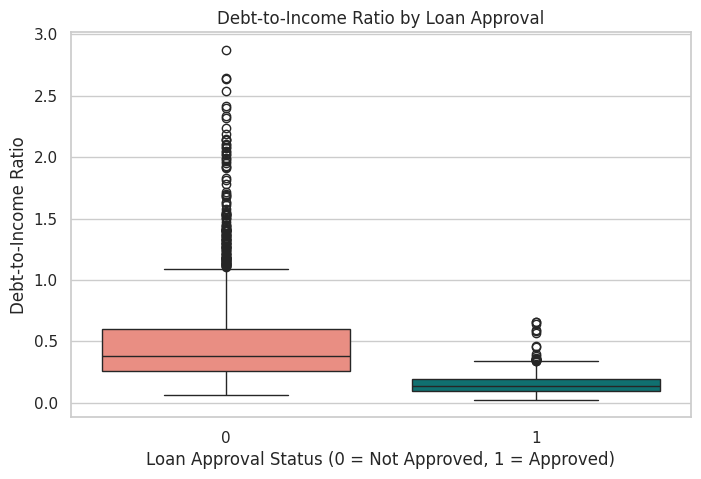

In [40]:

# 4.Boxplot for Debt-to-Income Ratio
# Shows how Debt-to-Income Ratios differ between approved and declined loans, highlighting their impact on approval.
plt.figure(figsize=(8,5))
sns.boxplot(
    x='LoanApproved',               # 0 = Not Approved, 1 = Approved
    y='TotalDebtToIncomeRatio',
    data=df,
    palette=['salmon','teal']
)
plt.title("Debt-to-Income Ratio by Loan Approval")
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

Loan approvals are strongly associated with lower Debt-to-Income (DTI) ratios and higher incomes. Approved applicants tend to have significantly lower DTI ratios (median ~0.15) and more stable income levels, while rejected applicants often show higher DTI ratios (many above 0.3) and a wider range of income, including lower levels. This suggests that lenders prioritize financial stability and lower debt burdens in approval decisions.

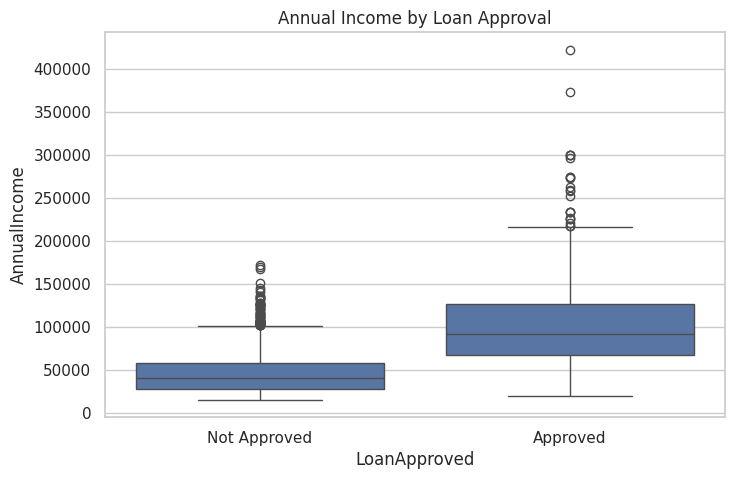

In [11]:
# 5. Annual Income vs Loan Approval
# Box plots show income spread for approved vs. rejected loans.

plt.figure(figsize=(8,5))
sns.boxplot(x='LoanApproved', y='AnnualIncome', data=df)
plt.title("Annual Income by Loan Approval")
plt.xticks([0,1], ["Not Approved", "Approved"])
plt.show()

Applicants whose loans were not approved predominantly had lower incomes, with a few high-income outliers still denied. In contrast, approved applicants had higher median incomes and interquartile ranges, including some very high-income outliers. This indicates that loan approval is strongly associated with higher annual income.


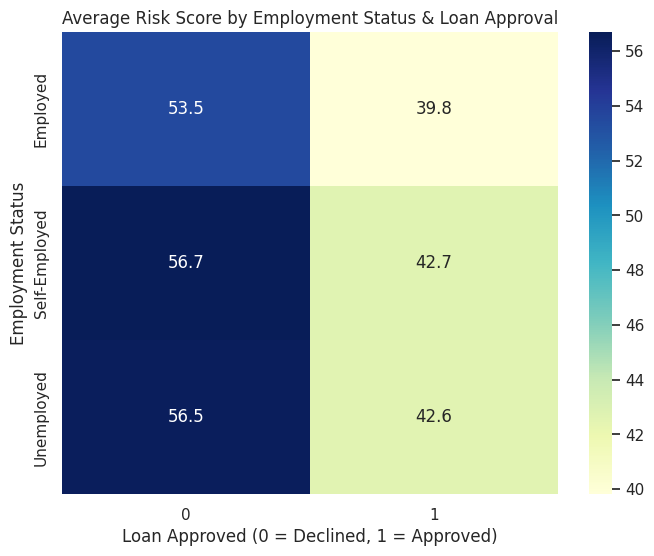

In [41]:
# 6. Heatmap of Loan Approval Rate by Employment & Risk Score
# Shows how average Risk Score varies across Employment Status categories for approved vs declined loans.

heatmap_data = df.pivot_table(
    index='EmploymentStatus',
    columns='LoanApproved',
    values='RiskScore',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu'
)
plt.title("Average Risk Score by Employment Status & Loan Approval")
plt.xlabel("Loan Approved (0 = Declined, 1 = Approved)")
plt.ylabel("Employment Status")
plt.show()



Declined loans have higher average Risk Scores (53.5–56.7), especially for Self-Employed and Unemployed applicants, while approved loans show lower scores (39.8–42.7) with Employed applicants having the lowest risk.

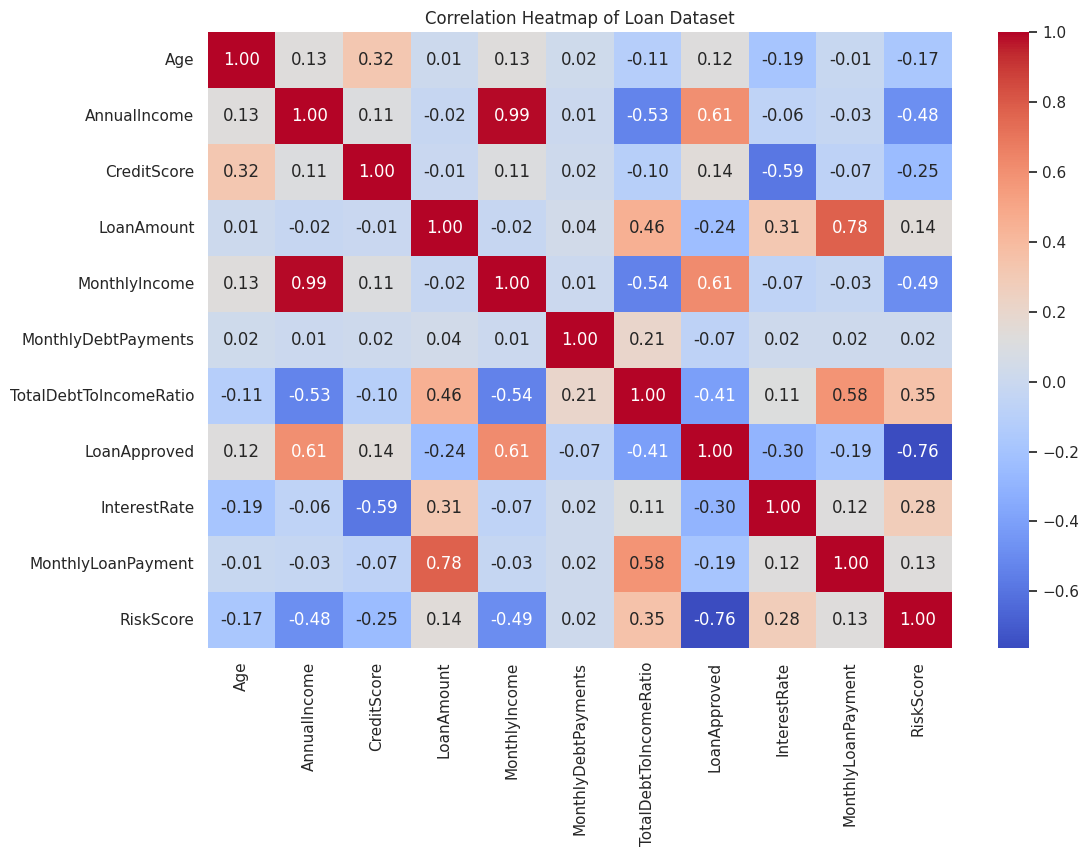

In [17]:
# 7. Correlation Heatmap
# The heatmap shows correlations between numerical features to identify key relationships.
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Loan Dataset")
plt.show()

The heatmap reveals that loan approval has a strong negative correlation with risk score (-0.76), indicating that applicants with higher risk scores are less likely to be approved, while annual and monthly income show moderate positive correlations (\~0.61), suggesting that higher income improves approval chances. Loan amount and monthly loan payment are strongly positively correlated (0.78), as larger loans lead to higher payments. Credit score has a strong negative correlation with interest rate (-0.59), meaning better credit scores result in lower interest rates, and a slight positive correlation (0.14) with loan approval, indicating only a minor influence. Additionally, the total debt-to-income ratio negatively correlates with income (\~-0.53/-0.54), showing that higher income reduces this ratio.

